### 親水性ポケット or 疎水性ポケットを持つタンパクを取得

In [14]:
import sys
sys.path.append('../..')

In [15]:
import os
import numpy as np
from lib.path import get_training_data_dir
from data_loader.SingleDataLoader import SingleDataLoader

In [25]:
data_dir = '../../../data/pdb_group/'
phobic_pdb_list_path = os.path.join(data_dir, 'ligand_size_over15000_pdb')
philic_pdb_list_path = os.path.join(data_dir, 'ligand_size_under15000_pdb')

In [26]:
with open(phobic_pdb_list_path, 'r') as f:
    phobic_pdb_list = f.read().splitlines()
with open(philic_pdb_list_path, 'r') as f:
    philic_pdb_list = f.read().splitlines()

In [27]:
print(len(phobic_pdb_list), len(philic_pdb_list))

864 1855


### それぞれのタンパクのトレーニングデータを取得し、合計値を配列に格納

In [28]:
DATA_TYPE1 = 'gr'
DATA_VOXEL_NUM = 10
CLASSIFYING_RULE = 'WaterClassifyingRuleSurface'
LIGAND_POCKET_DEFINER = 'LigandPocketDefinerOriginal'
LIGAND_VOXEL_NUM = 8
training_data_dir = get_training_data_dir(DATA_TYPE1, DATA_VOXEL_NUM, CLASSIFYING_RULE, LIGAND_POCKET_DEFINER, LIGAND_VOXEL_NUM)

In [29]:
data_loader = SingleDataLoader(training_data_dir)
phobic_data, phobic_label = data_loader.load_data(phobic_pdb_list_path)
philic_data, philic_label = data_loader.load_data(philic_pdb_list_path)

Error processing 2p15: No data found for 2p15
Error processing 2pog: No data found for 2pog
Error processing 3kr4: No data found for 3kr4
Error processing 4ajl: No data found for 4ajl
Error processing 1olu: No data found for 1olu
Error processing 3ebo: No data found for 3ebo
Error processing 4lvt: No data found for 4lvt
Error processing 4lxd: No data found for 4lxd
Error processing 2d3u: No data found for 2d3u
Error processing 2d3z: No data found for 2d3z
Error processing 2zkj: No data found for 2zkj
Error processing 2zq0: No data found for 2zq0
Error processing 2j47: No data found for 2j47
Error processing 4jn2: No data found for 4jn2
Error processing 4u0f: No data found for 4u0f
Error processing 5afv: No data found for 5afv
Error processing 3t60: No data found for 3t60
Error processing 3t70: No data found for 3t70
Error processing 4p58: No data found for 4p58
Error processing 4poh: No data found for 4poh
Error processing 4poj: No data found for 4poj
Error processing 3i4b: No data fou

In [30]:
phobic_label

array([0., 0., 0., ..., 0., 0., 0.])

In [31]:
replace_sum_phobic = []
non_replace_sum_phobic = []
phobic_data_array = np.array(phobic_data)
for data, label in zip(phobic_data_array, phobic_label):
    if label == 0:
        non_replace_sum_phobic.append(data.sum())
    else:
        replace_sum_phobic.append(data.sum())

replace_sum_philic = []
non_replace_sum_philic = []
philic_data_array = np.array(philic_data)
for data, label in zip(philic_data_array, philic_label):
    if label == 0:
        non_replace_sum_philic.append(data.sum())
    else:
        replace_sum_philic.append(data.sum())

### plotする

In [32]:
import matplotlib.pyplot as plt

def plot_histogram(array1, array2, bins=100, title1='', title2=''):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # 1行2列のサブプロットを作成

    # array1のヒストグラムをプロット
    ax1.hist(array1, bins=bins, alpha=0.7, color='blue', label='Array 1')
    ax1.set_title(title1)
    ax1.set_xlabel('sum of gr')
    ax1.set_ylabel('Frequency')

    # array2のヒストグラムをプロット
    ax2.hist(array2, bins=bins, alpha=0.7, color='red', label='Array 2')
    ax2.set_title(title2)
    ax2.set_xlabel('sum of gr')
    ax2.set_ylabel('Frequency')

    plt.tight_layout()  # レイアウトを自動調整
    plt.show()  # グラフを表示

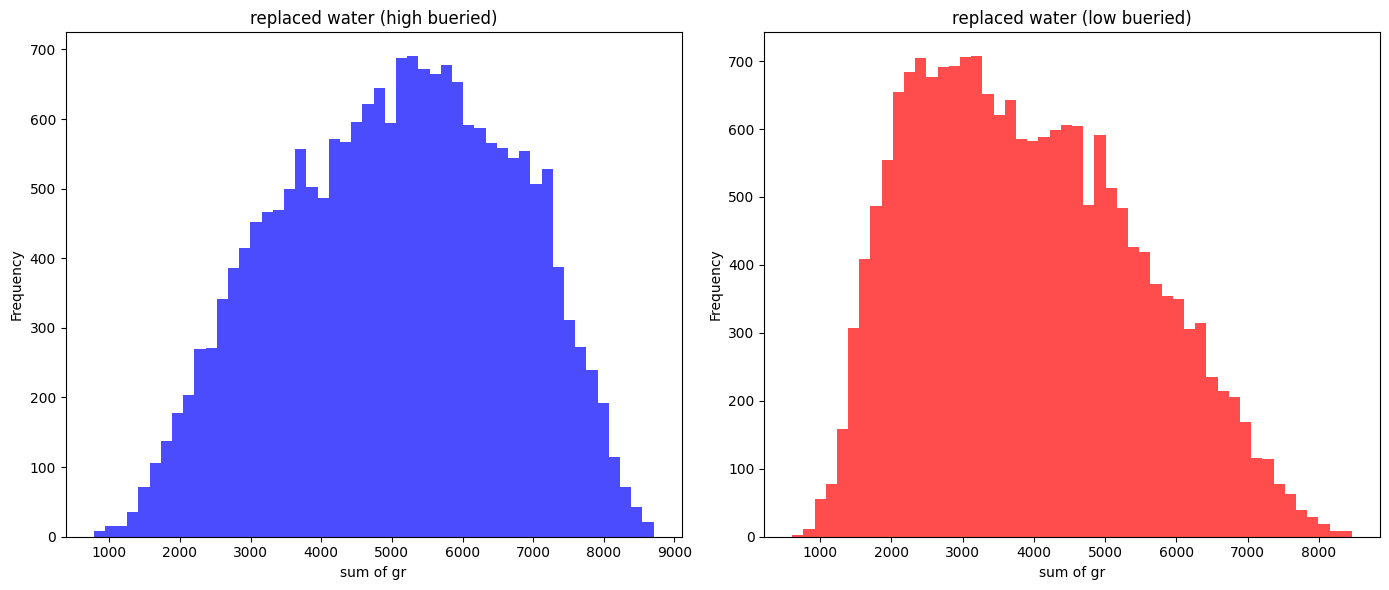

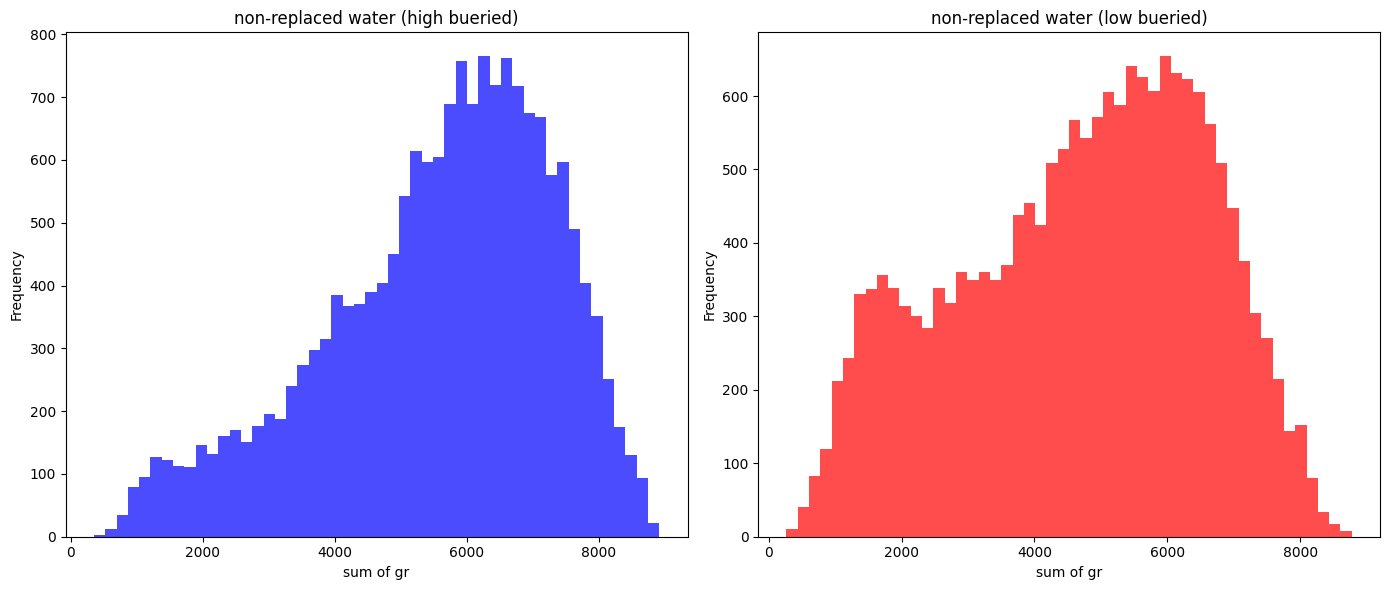

In [33]:
plot_histogram(replace_sum_phobic, replace_sum_philic, 50, 'replaced water (high bueried)', 'replaced water (low bueried)')
plot_histogram(non_replace_sum_phobic, non_replace_sum_philic, 50, 'non-replaced water (high bueried)', 'non-replaced water (low bueried)')

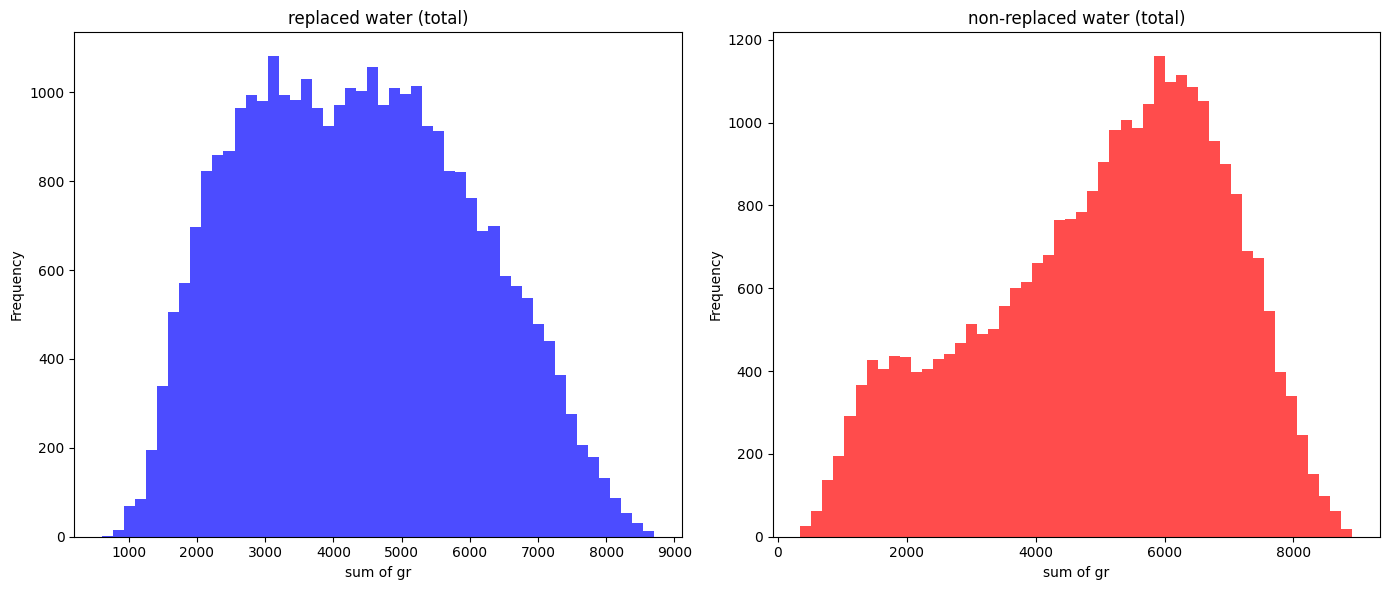

In [12]:
plot_histogram(replace_sum_phobic + replace_sum_philic, non_replace_sum_phobic + non_replace_sum_philic, 50, 'replaced water (total)', 'non-replaced water (total)')